# Fundraising Strategies

![](banner_fundraising.jpg)

Data Retrieval | Data Selection | Descriptive Statistics | Synthetic Variables | Cross-Tabulation | Data Visualization

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
options(repr.matrix.max.rows=100)
output_size(9,4.5)
                                
PARTY_COLOR = c(DEM=PALETTE[1], REP=PALETTE[2], LIB=PALETTE[4], GRE=PALETTE[3], NON="gray60", IND="gray60", UN="gray60", CON="gray60", OTH="gray60", UNK="gray60")

.................................................... start of document ....................................................

## Situation

* **Role:** Director of Fundraising for a US President candidate, 2020. 
* **Business Decision:** What is your fundraising strategy?  Target whom, where, when?
* **Approach:** Explore data re: 2019 donations made to all candidates, use insights to inform your fundraising strategy.
* **Data:** US Federal Election Commission, Contributions by individuals for 2020 election cycle.
  * https://www.fec.gov/
  * https://www.fec.gov/data/browse-data/?tab=bulk-data
  * https://www.fec.gov/campaign-finance-data/contributions-individuals-file-description/
  * https://www.fec.gov/updates/reports-due-2020/

## Data

### Retrieve Raw Data

#### Candidates

Retrieve raw data re: candidate names.

In [2]:
data.cn = read.csv("cn.txt", header=FALSE, sep="|")
header = read.csv("cn_header_file.csv", header=FALSE, stringsAsFactor=FALSE)
colnames(data.cn) = header[1,]

size(data.cn)
fmt(data.cn[1:3,], "First few observations:", position="left")

observations,variables
6064,15


CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
H0AK00105,"LAMB, THOMAS",N,2020,AK,H,NA,,N,C00607515,1861 W LAKE LUCILLE DR,,WASILLA,AK,99654
H0AL01055,"CARL, JERRY LEE, JR",REP,2020,AL,H,1,O,C,C00697789,PO BOX 852138,,MOBILE,AL,36685
H0AL01063,"LAMBERT, DOUGLAS WESTLEY III",REP,2020,AL,H,1,O,C,C00701557,7194 STILLWATER BLVD,,SPANISH FORT,AL,36527


Filter for presidential candidates only.

In [3]:
data.cnp = data.cn[(data.cn$CAND_OFFICE=="P") & (data.cn$CAND_ELECTION_YR==2020),]

size(data.cnp)
fmt(length(unique(data.cnp$CAND_NAME)), "# of unique candidates")
fmt(data.cnp[1:3,], "First few observations:", position="left")

observations,variables
1016,15


# of unique candidates
1015


CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
P00000679,"CARROLL, JERRY LEON",NNE,2020,US,P,0,C,N,C00214999,PO BOX 9079,,STOCKTON,CA,95208
P00001099,"MARCINEK, ALOYSIUS R",IND,2020,US,P,0,C,N,,15224 PINE HILL TRAIL,,MIDDLEBURG HTS,OH,44130
P00003244,"WINTERBOTTOM, THOMAS FRANCIS",DEM,2020,US,P,0,C,N,C00549923,"262 KING ST., APT 722",,POTTSTOWN,PA,194645580


Find any duplicated candidate observations (i.e., candidates with more than one candidate ID) - just curious.

In [4]:
data.cnp[data.cnp$CAND_NAME == data.cnp$CAND_NAME[duplicated(data.cnp$CAND_NAME)],]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4577,P00010496,"JONES, ARNOLD MATTHEW",DEM,2020,US,P,0,C,N,C00692186,1246 WEST 1000 NORTH,,SALT LAKE CITY,UT,84116
5235,P80002876,"JONES, ARNOLD MATTHEW",DEM,2020,US,P,0,C,N,C00692186,1246 WEST 1000 NORTH,,SALT LAKE CITY,UT,84116


Tally counts of candidates by party.

In [5]:
data.cnp.party = aggregate(CAND_ID ~ CAND_PTY_AFFILIATION, data.cnp, length)
names(data.cnp.party)[2] = "count"
data.cnp.party = data.cnp.party[order(data.cnp.party$count, decreasing=TRUE),]

data.cnp.party$CAND_PTY_AFFILIATION
fmt(data.cnp.party[1:5,], "First few observations:", position="left")

[1] DEM IND REP LIB OTH W   NNE GRE UN  UNK NPA IDP NON AIP     CON IAP DFL COM
[20] LBL APF CIT CRV HRP ICD N/A NAP PAF REF SUS VET ACE AIC AKI AMP EAS FED FHB
[39] GRN GWP KSP NIC NP  POP PPY PRO RTL SLP SOC SWP UST
75 Levels:  ACE ACT AIC AIP AKI AMP APF C CIT CMD CNC COM CON CRV CST ... WTP

CAND_PTY_AFFILIATION,count
DEM,306
IND,204
REP,152
LIB,56
OTH,42


#### Candidate/Committee Associations

Retrieve raw data re: candidate/committee associations.

In [6]:
data.link = read.csv("ccl.txt", header=FALSE, sep="|")
header = read.csv("ccl_header_file.csv", header=FALSE, stringsAsFactor=FALSE)
colnames(data.link) = header[1,]

size(data.link)
fmt(data.link[1:3,], "First few observations:", position="left")

observations,variables
5843,7


CAND_ID,CAND_ELECTION_YR,FEC_ELECTION_YR,CMTE_ID,CMTE_TP,CMTE_DSGN,LINKAGE_ID
C00713602,2019,2020,C00712851,X,U,228963
H0AK00105,2020,2020,C00607515,H,P,229250
H0AL01055,2020,2020,C00697789,H,P,226125


Combine candidate/committee association data with other previously retrieved data.

In [7]:
data.cnpm = merge(data.cnp, data.link, by=c("CAND_ID","CAND_ELECTION_YR"))

size(data.cnpm)
fmt(length(unique(data.cnpm$CAND_ID)), "# unique candidates")
fmt(data.cnpm[1:3,], "First few observations:", position="left")

observations,variables
644,20


# unique candidates
603


CAND_ID,CAND_ELECTION_YR,CAND_NAME,CAND_PTY_AFFILIATION,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP,FEC_ELECTION_YR,CMTE_ID,CMTE_TP,CMTE_DSGN,LINKAGE_ID
P00000679,2020,"CARROLL, JERRY LEON",NNE,US,P,0,C,N,C00214999,PO BOX 9079,,STOCKTON,CA,95208,2020,C00214999,P,P,227090
P00003244,2020,"WINTERBOTTOM, THOMAS FRANCIS",DEM,US,P,0,C,N,C00549923,"262 KING ST., APT 722",,POTTSTOWN,PA,194645580,2020,C00549923,P,P,222834
P00003814,2020,"MALONE, YEHANNA JOAN M M",REP,US,P,0,C,N,C00691121,1140 N CAPITOL STREET NW SUITE 504,,WASHINGTON,DC,20002,2020,C00691121,P,P,225072


#### Donations

Retrieve raw data re: individual donations.

In [8]:
clock.start()
data.xaction = read.csv("itcont.txt", header=FALSE, sep="|") # may take about 12 minutes
clock.stop()

header = read.csv("indiv_header_file.csv", header=FALSE, stringsAsFactor=FALSE)
colnames(data.xaction) = header[1,]

size(data.xaction)
fmt(data.xaction[1:3,], "First few observations:", position="left")

Time difference of 7.43265 mins


observations,variables
7820168,21


CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
C00432906,T,TER,P2018,201901219143901216,22Y,IND,"LEMUNYON, GLENN",WASHINGTON,DC,20002,,,1182019,-500,,SB20A.55755,1305860,,,4021320191639407616
C00432906,T,TER,P2018,201901219143901216,22Y,IND,"LEMUNYON, GLENN",WASHINGTON,DC,20002,,,1182019,500,,SB20A.55756,1305860,,,4021320191639407616
C00638478,T,TER,P2018,201901289144040160,15C,CAN,"JANOWICZ, PHILIP",BUENA PARK,CA,906211685,FRIENDS OF PHIL JANOWICZ,CANDIDATE,1282019,33000,H8CA39133,3703296,1307800,,CONVERTING PRIMARY LOAN TO CONTRIBUTION,4021220191639267840


Combine donation data with other previously retireved data.

In [9]:
clock.start()
data = merge(data.cnpm, data.xaction, by="CMTE_ID") # may take about 30 seconds
clock.stop()

size(data)
fmt(length(unique(data$CAND_NAME)), "# unique candidates")
fmt(data[1:3,], "First few observations:", position="left") 

Time difference of 19.84096 secs


observations,variables
1319676,40


# unique candidates
75


CMTE_ID,CAND_ID,CAND_ELECTION_YR,CAND_NAME,CAND_PTY_AFFILIATION,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP,FEC_ELECTION_YR,CMTE_TP,CMTE_DSGN,LINKAGE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
C00202176,P80000268,2020,"CARTER, WILLIE FELIX",DEM,US,P,0,C,C,C00202176,5100 TURNER STREET,,FORT WORTH,CA,76115,2020,P,P,222384,N,Q2,P2020,201907159150622432,15C,CAN,"CARTER, WILLIE FELIX",FORT WORTH,TX,76105,SELF EMPLOYED/RETIRED,VIDEOGRAPHY/SOUND DJ,6302019,580,P80000268,SA17D.4553,1339557,,,4071620191659696128
C00202176,P80000268,2020,"CARTER, WILLIE FELIX",DEM,US,P,0,C,C,C00202176,5100 TURNER STREET,,FORT WORTH,CA,76115,2020,P,P,222384,N,Q1,P2020,201904089146051168,15C,CAN,"CARTER, WILLIE FELIX",FORT WORTH,TX,76105,SELF EMPLOYED/RETIRED,VIDEOGRAPHY/SOUND DJ,3312019,472,P80000268,SA17D.4522,1322939,,,4040920191646084096
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,A,Q3,P2020,202001139167160096,15,IND,"PARROTT, IDA",FRESNO,CA,93711,RETIRED,RETIRED,9092019,500,,AC16C70EB416D48AAA63,1369902,,,4011420201684330496


#### Files for Convenience

Optionally, store a copy of data as a file for future use. 

In [10]:
clock.start()
write.csv(data, "data.csv", row.names=FALSE) # may take about 2 minutes
clock.stop()

Time difference of 1.288757 mins


Optionally, retrieve already combined dataset if available, rather than retrieve raw data.

In [7]:
clock.start()
data = read.csv("data.csv", header=TRUE) # may take about 2 minutes
clock.stop()

size(data)
fmt(length(unique(data$CAND_NAME)), "# unique candidates")
fmt(data[1:3,], "First few observations:", position="left") 

Time difference of 1.746098 mins


observations,variables
1319676,40


# unique candidates
75


CMTE_ID,CAND_ID,CAND_ELECTION_YR,CAND_NAME,CAND_PTY_AFFILIATION,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP,FEC_ELECTION_YR,CMTE_TP,CMTE_DSGN,LINKAGE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
C00202176,P80000268,2020,"CARTER, WILLIE FELIX",DEM,US,P,0,C,C,C00202176,5100 TURNER STREET,,FORT WORTH,CA,76115,2020,P,P,222384,N,Q2,P2020,201907159150622432,15C,CAN,"CARTER, WILLIE FELIX",FORT WORTH,TX,76105,SELF EMPLOYED/RETIRED,VIDEOGRAPHY/SOUND DJ,6302019,580,P80000268,SA17D.4553,1339557,,,4071620191659696128
C00202176,P80000268,2020,"CARTER, WILLIE FELIX",DEM,US,P,0,C,C,C00202176,5100 TURNER STREET,,FORT WORTH,CA,76115,2020,P,P,222384,N,Q1,P2020,201904089146051168,15C,CAN,"CARTER, WILLIE FELIX",FORT WORTH,TX,76105,SELF EMPLOYED/RETIRED,VIDEOGRAPHY/SOUND DJ,3312019,472,P80000268,SA17D.4522,1322939,,,4040920191646084096
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,A,Q3,P2020,202001139167160096,15,IND,"PARROTT, IDA",FRESNO,CA,93711,RETIRED,RETIRED,9092019,500,,AC16C70EB416D48AAA63,1369902,,,4011420201684330496


### Transform Representation

Transform dates from factor type to special date type.

In [12]:
data$TRANSACTION_DT = mdy(data$TRANSACTION_DT)
fmt(class(data$TRANSACTION_DT))
size(data)
fmt(data[1:3,], "First few observations:", position="left")

class(data$TRANSACTION_DT)
Date


observations,variables
1319676,40


CMTE_ID,CAND_ID,CAND_ELECTION_YR,CAND_NAME,CAND_PTY_AFFILIATION,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP,FEC_ELECTION_YR,CMTE_TP,CMTE_DSGN,LINKAGE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
C00202176,P80000268,2020,"CARTER, WILLIE FELIX",DEM,US,P,0,C,C,C00202176,5100 TURNER STREET,,FORT WORTH,CA,76115,2020,P,P,222384,N,Q2,P2020,201907159150622432,15C,CAN,"CARTER, WILLIE FELIX",FORT WORTH,TX,76105,SELF EMPLOYED/RETIRED,VIDEOGRAPHY/SOUND DJ,2019-06-30,580,P80000268,SA17D.4553,1339557,,,4071620191659696128
C00202176,P80000268,2020,"CARTER, WILLIE FELIX",DEM,US,P,0,C,C,C00202176,5100 TURNER STREET,,FORT WORTH,CA,76115,2020,P,P,222384,N,Q1,P2020,201904089146051168,15C,CAN,"CARTER, WILLIE FELIX",FORT WORTH,TX,76105,SELF EMPLOYED/RETIRED,VIDEOGRAPHY/SOUND DJ,2019-03-31,472,P80000268,SA17D.4522,1322939,,,4040920191646084096
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,A,Q3,P2020,202001139167160096,15,IND,"PARROTT, IDA",FRESNO,CA,93711,RETIRED,RETIRED,2019-09-09,500,,AC16C70EB416D48AAA63,1369902,,,4011420201684330496


Add a synthetic variable for donor tier:
* low is \\$0 to <\\$100
* mid is \\$100 to <\\$1000
* high is >\\$1000
* other is <\\$0

In [13]:
data$tier = NA
data$tier[data$TRANSACTION_AMT>=0   & data$TRANSACTION_AMT<100]  = "low" 
data$tier[data$TRANSACTION_AMT>=100 & data$TRANSACTION_AMT<1000] = "mid"
data$tier[data$TRANSACTION_AMT>=1000] = "high"
data[is.na(data$tier),"tier"] = "other"
data$tier = factor(data$tier, levels=c("high", "mid", "low", "other"))

size(data)
fmt(data[1:3,], "First few observations", position="left")

observations,variables
1319676,41


CMTE_ID,CAND_ID,CAND_ELECTION_YR,CAND_NAME,CAND_PTY_AFFILIATION,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP,FEC_ELECTION_YR,CMTE_TP,CMTE_DSGN,LINKAGE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,tier
C00202176,P80000268,2020,"CARTER, WILLIE FELIX",DEM,US,P,0,C,C,C00202176,5100 TURNER STREET,,FORT WORTH,CA,76115,2020,P,P,222384,N,Q2,P2020,201907159150622432,15C,CAN,"CARTER, WILLIE FELIX",FORT WORTH,TX,76105,SELF EMPLOYED/RETIRED,VIDEOGRAPHY/SOUND DJ,2019-06-30,580,P80000268,SA17D.4553,1339557,,,4071620191659696128,mid
C00202176,P80000268,2020,"CARTER, WILLIE FELIX",DEM,US,P,0,C,C,C00202176,5100 TURNER STREET,,FORT WORTH,CA,76115,2020,P,P,222384,N,Q1,P2020,201904089146051168,15C,CAN,"CARTER, WILLIE FELIX",FORT WORTH,TX,76105,SELF EMPLOYED/RETIRED,VIDEOGRAPHY/SOUND DJ,2019-03-31,472,P80000268,SA17D.4522,1322939,,,4040920191646084096,mid
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,A,Q3,P2020,202001139167160096,15,IND,"PARROTT, IDA",FRESNO,CA,93711,RETIRED,RETIRED,2019-09-09,500,,AC16C70EB416D48AAA63,1369902,,,4011420201684330496,mid


## Overview

### Before Adjusting for Self-Funding 

In [14]:
fmt(sum(data$TRANSACTION_AMT), "scope of opportunity: total $")

scope of opportunity: total $
227311195


In [15]:
fmt(length(unique(data$CAND_NAME)), "# unique candidates")

# unique candidates
75


In [16]:
fmt(describe(data$TRANSACTION_AMT), "$ donated per transaction", position="left")

vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
1,1319676,172.2477,17908.43,27,49.09811,32.6172,-10000,15000000,15010000,652.4736,468807.7,15.5892


### Adjust for Self-Funding

Find which donations come from the candidates themselves.

In [17]:
data.self_fund = data[as.character(data$CAND_NAME) == as.character(data$NAME),]

size(data.self_fund)
fmt(length(unique(data.self_fund$CAND_NAME)), "# unique candidates")

observations,variables
814,41


# unique candidates
30


Keep only donations that did not come from the candidates themselves.

In [18]:
data = data[as.character(data$CAND_NAME) != as.character(data$NAME),]

size(data)
fmt(length(unique(data$CAND_NAME)), "# unique candidates")
fmt(data[1:3,], "First few observations:", position="left")

observations,variables
1318862,41


# unique candidates
60


CMTE_ID,CAND_ID,CAND_ELECTION_YR,CAND_NAME,CAND_PTY_AFFILIATION,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP,FEC_ELECTION_YR,CMTE_TP,CMTE_DSGN,LINKAGE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,tier
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,A,Q3,P2020,202001139167160096,15,IND,"PARROTT, IDA",FRESNO,CA,93711,RETIRED,RETIRED,2019-09-09,500,,AC16C70EB416D48AAA63,1369902,,,4011420201684330496,mid
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,A,Q3,P2020,202001139167160096,15,IND,"OECHSLI, CHRISTOPHER",NEW YORK,NY,10011,ATLANTIC PHILANTHROPIES,CEO,2019-09-08,500,,A16407256CA4046C5AC3,1369902,,,4011420201684330496,mid
C00285254,P00013649,2020,"SANFORD, MARSHALL HON",REP,US,P,0,C,C,C00285254,509 KING STREET,,MT. PLEASANT,SC,29464,2020,P,P,229643,A,Q3,P2020,202001139167160096,15,IND,"OBRIEN, BETTY",CHARLESTON,SC,29401,RETIRED,RETIRED,2019-09-08,1000,,AECE8E115CA4F4B97B9B,1369902,,,4011420201684329984,high


## Who Donated?

### Perspective: By Candidate, By Party

In [8]:
data.cand = aggregate(TRANSACTION_AMT ~ CAND_NAME+CAND_PTY_AFFILIATION, data, length)
names(data.cand)[3] = "count"

temp = aggregate(TRANSACTION_AMT ~ CAND_NAME+CAND_PTY_AFFILIATION, data, sum)
data.cand = merge(data.cand, temp, by=c("CAND_NAME", "CAND_PTY_AFFILIATION"))
names(data.cand)[4] = "sum"

temp = aggregate(TRANSACTION_AMT ~ CAND_NAME+CAND_PTY_AFFILIATION, data, mean)
data.cand = merge(data.cand, temp, by=c("CAND_NAME", "CAND_PTY_AFFILIATION"))
names(data.cand)[5] = "mean"

fmt(data.cand, "donations by candidate")

CAND_NAME,CAND_PTY_AFFILIATION,count,sum,mean
"ARANJO, ROLAND",GRE,1,10,10.00000
"ARMSTRONG, KENNETH REED",LIB,24,4463,185.95833
"AUGUSTSON, ALAN",GRE,7,305,43.57143
"AVINA, CANDACE MARIE BATES",UNK,1,25,25.00000
"BEHRMAN, DAN TAXATION IS THEFT",LIB,2,14714,7357.00000
"BENNET, MICHAEL F.",DEM,7215,3172488,439.70728
"BIDEN, JOSEPH R JR",DEM,78279,25252681,322.59841
"BOOKER, CORY A.",DEM,31085,11212933,360.71845
"BRADFORD, SCOTT",IND,2,250,125.00000
"BRAINARD, CHRISTOPHER",REP,3,225,75.00000


In [9]:
data.party = aggregate(TRANSACTION_AMT ~ CAND_PTY_AFFILIATION, data, length)
names(data.party)[2] = "count"

temp = aggregate(TRANSACTION_AMT ~ CAND_PTY_AFFILIATION, data, sum)
data.party = merge(data.party, temp, by="CAND_PTY_AFFILIATION")
names(data.party)[3] = "sum"

temp = aggregate(TRANSACTION_AMT ~ CAND_PTY_AFFILIATION, data, mean)
data.party = merge(data.party, temp, by="CAND_PTY_AFFILIATION")
names(data.party)[4] = "mean"

fmt(data.party, "donations by party")

CAND_PTY_AFFILIATION,count,sum,mean
CON,8,1706,213.25000
DEM,1203805,216054466,179.47630
GRE,223,22798,102.23318
IND,78,24398,312.79487
LIB,124,63521,512.26613
NON,7,6125,875.00000
OTH,7,855,122.14286
REP,115422,11137028,96.48965
UN,1,273,273.00000
UNK,1,25,25.00000


#### # Donations  

In [10]:
fmt(data.cand[order(data.cand$count, decreasing=TRUE),], "donations by candidate (sorted by count)")

CAND_NAME,CAND_PTY_AFFILIATION,count,sum,mean
"SANDERS, BERNARD",DEM,418094,18499929,44.24825
"BUTTIGIEG, PETE",DEM,236617,38331987,162.00014
"WARREN, ELIZABETH",DEM,226972,17973423,79.18784
"TRUMP, DONALD J.",REP,113865,10154723,89.18213
"BIDEN, JOSEPH R JR",DEM,78279,25252681,322.59841
"YANG, ANDREW MR.",DEM,52840,4788266,90.61821
"HARRIS, KAMALA D.",DEM,44274,13910118,314.18255
"KLOBUCHAR, AMY J.",DEM,37956,8423600,221.93066
"BOOKER, CORY A.",DEM,31085,11212933,360.71845
"WILLIAMSON, MARIANNE",DEM,18340,2170057,118.32372


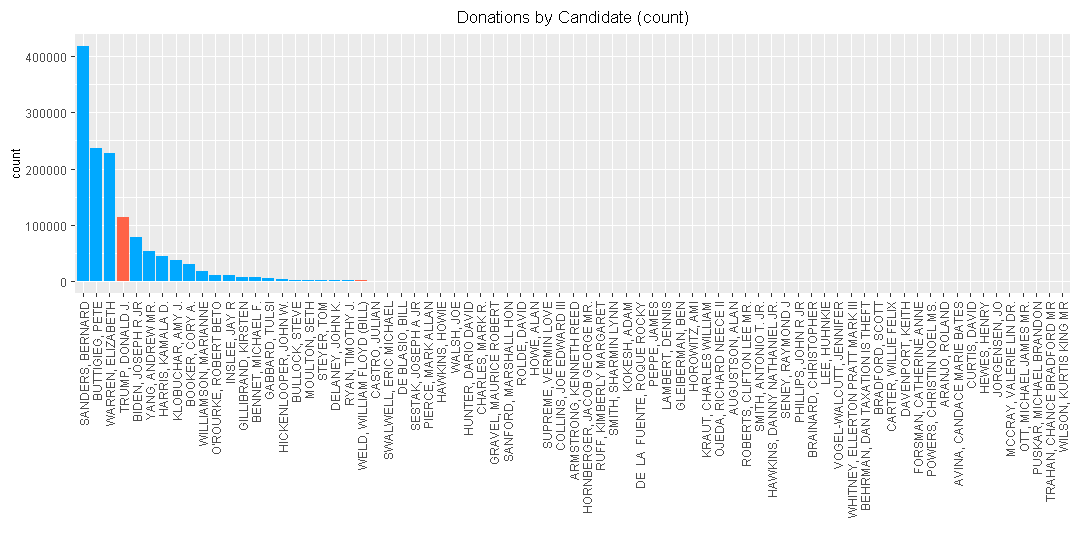

In [11]:
ggplot(data.cand) + ggtitle("Donations by Candidate (count)") + xlab("") +
geom_col(aes(x=sortby(CAND_NAME, count, decreasing=TRUE), y=count, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.x_axis_90 + theme.no_legend

In [12]:
fmt(data.cand[data.cand$count == max(data.cand$count),], "candidate with highest number of donations")

CAND_NAME,CAND_PTY_AFFILIATION,count,sum,mean
"SANDERS, BERNARD",DEM,418094,18499929,44.24825


In [13]:
fmt(data.party[order(data.party$count, decreasing=TRUE),], "donations by party (sorted by count)")

CAND_PTY_AFFILIATION,count,sum,mean
DEM,1203805,216054466,179.47630
REP,115422,11137028,96.48965
GRE,223,22798,102.23318
LIB,124,63521,512.26613
IND,78,24398,312.79487
CON,8,1706,213.25000
NON,7,6125,875.00000
OTH,7,855,122.14286
UN,1,273,273.00000
UNK,1,25,25.00000


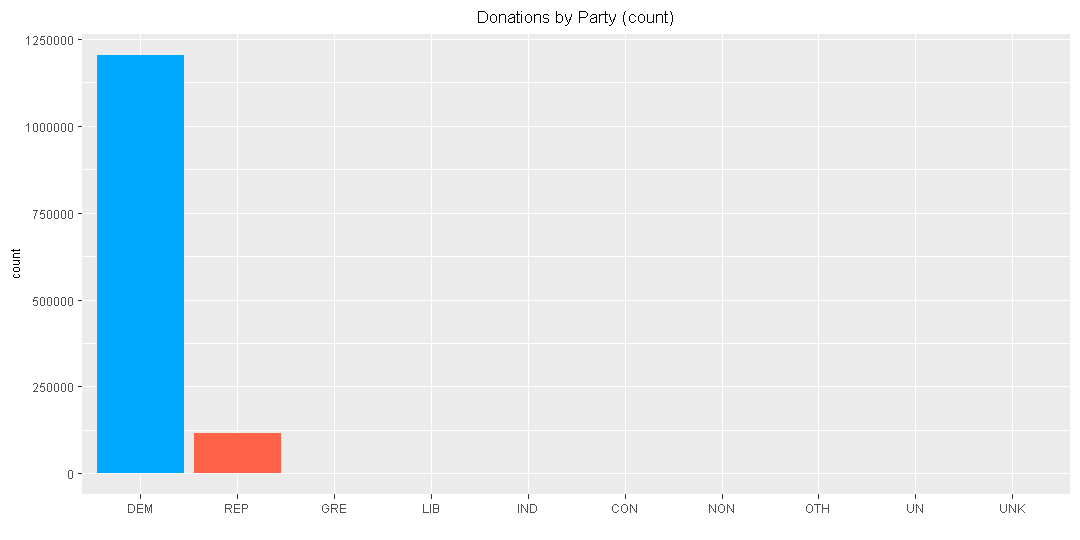

In [14]:
ggplot(data.party) + ggtitle("Donations by Party (count)") + xlab("") +
geom_col(aes(x=sortby(CAND_PTY_AFFILIATION, count, decreasing=TRUE), y=count, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.no_legend

#### \\$ Donated  

In [15]:
fmt(data.cand[order(data.cand$sum, decreasing=TRUE),], "donations by candidate (sorted by sum)")

CAND_NAME,CAND_PTY_AFFILIATION,count,sum,mean
"STEYER, TOM",DEM,1906,48171043,25273.36988
"BUTTIGIEG, PETE",DEM,236617,38331987,162.00014
"BIDEN, JOSEPH R JR",DEM,78279,25252681,322.59841
"SANDERS, BERNARD",DEM,418094,18499929,44.24825
"WARREN, ELIZABETH",DEM,226972,17973423,79.18784
"HARRIS, KAMALA D.",DEM,44274,13910118,314.18255
"BOOKER, CORY A.",DEM,31085,11212933,360.71845
"TRUMP, DONALD J.",REP,113865,10154723,89.18213
"KLOBUCHAR, AMY J.",DEM,37956,8423600,221.93066
"YANG, ANDREW MR.",DEM,52840,4788266,90.61821


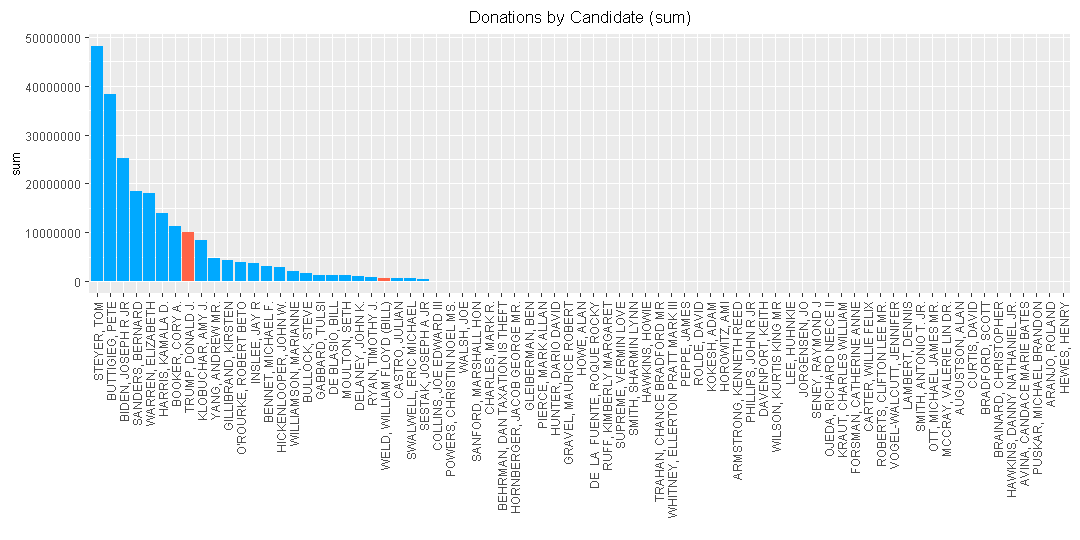

In [16]:
ggplot(data.cand) + ggtitle("Donations by Candidate (sum)") + xlab("") +
geom_col(aes(x=sortby(CAND_NAME, sum, decreasing=TRUE), y=sum, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.x_axis_90 + theme.no_legend

In [17]:
fmt(data.cand[data.cand$sum == max(data.cand$sum),], "candidate with highest $ donated")

CAND_NAME,CAND_PTY_AFFILIATION,count,sum,mean
"STEYER, TOM",DEM,1906,48171043,25273.37


In [18]:
fmt(data.party[order(data.party$sum, decreasing=TRUE),], "donations by party (sorted by sum)")

CAND_PTY_AFFILIATION,count,sum,mean
DEM,1203805,216054466,179.47630
REP,115422,11137028,96.48965
LIB,124,63521,512.26613
IND,78,24398,312.79487
GRE,223,22798,102.23318
NON,7,6125,875.00000
CON,8,1706,213.25000
OTH,7,855,122.14286
UN,1,273,273.00000
UNK,1,25,25.00000


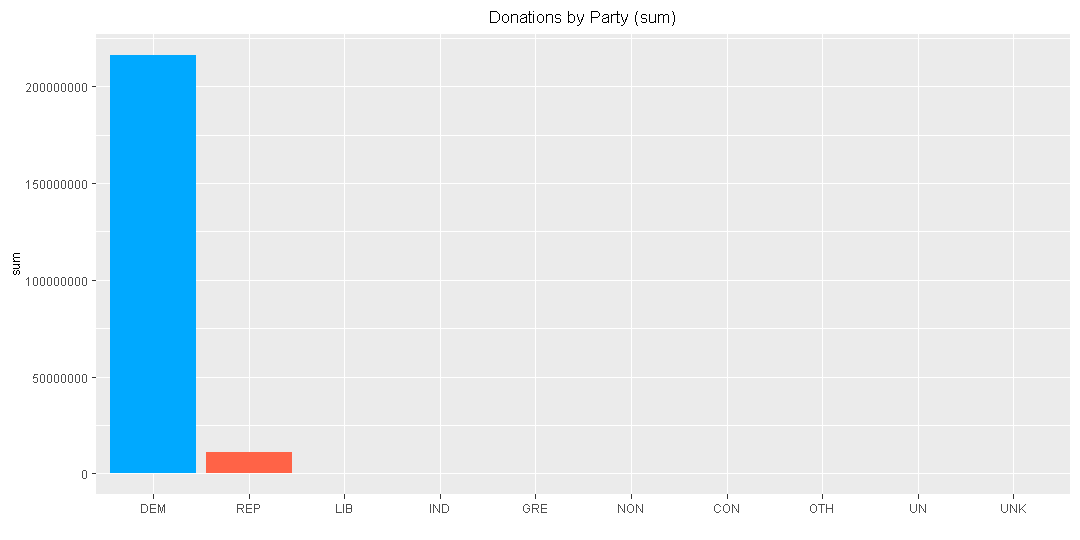

In [19]:
ggplot(data.party) + ggtitle("Donations by Party (sum)") + xlab("") +
geom_col(aes(x=sortby(CAND_PTY_AFFILIATION, sum, decreasing=TRUE), y=sum, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.no_legend

#### Average \\$ Donated  

In [20]:
fmt(data.cand[order(data.cand$mean, decreasing=TRUE),], "donations by candidate (sorted by mean)")

CAND_NAME,CAND_PTY_AFFILIATION,count,sum,mean
"POWERS, CHRISTIN NOEL MS.",DEM,2,112022,56011.00000
"STEYER, TOM",DEM,1906,48171043,25273.36988
"BEHRMAN, DAN TAXATION IS THEFT",LIB,2,14714,7357.00000
"TRAHAN, CHANCE BRADFORD MR",NON,1,5976,5976.00000
"COLLINS, JOE EDWARD III",REP,29,120000,4137.93103
"WILSON, KURTIS KING MR",DEM,1,2800,2800.00000
"JORGENSEN, JO",LIB,1,2300,2300.00000
"WHITNEY, ELLERTON PRATT MARK III",LIB,3,5700,1900.00000
"DAVENPORT, KEITH",IND,2,3300,1650.00000
"DE BLASIO, BILL",DEM,811,1305671,1609.95191


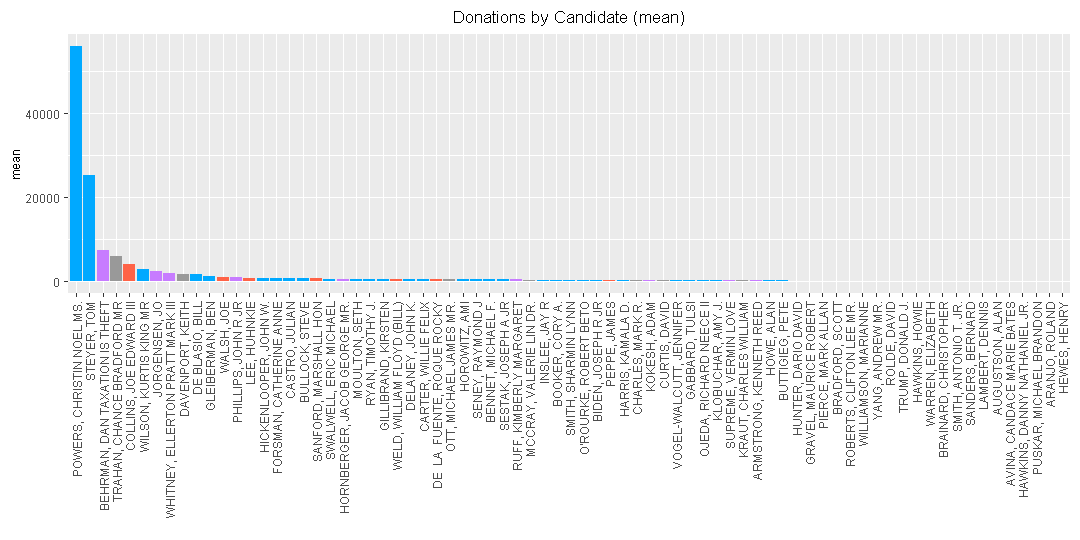

In [21]:
ggplot(data.cand) + ggtitle("Donations by Candidate (mean)") + xlab("") +
geom_col(aes(x=sortby(CAND_NAME, mean, decreasing=TRUE), y=mean, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.x_axis_90 + theme.no_legend

In [22]:
fmt(data.cand[data.cand$mean == max(data.cand$mean),], "candidate with highest average $ donated")

CAND_NAME,CAND_PTY_AFFILIATION,count,sum,mean
"POWERS, CHRISTIN NOEL MS.",DEM,2,112022,56011


In [23]:
fmt(data.party[order(data.party$mean, decreasing=TRUE),], "donations by party (sorted by mean)")

CAND_PTY_AFFILIATION,count,sum,mean
NON,7,6125,875.00000
LIB,124,63521,512.26613
IND,78,24398,312.79487
UN,1,273,273.00000
CON,8,1706,213.25000
DEM,1203805,216054466,179.47630
OTH,7,855,122.14286
GRE,223,22798,102.23318
REP,115422,11137028,96.48965
UNK,1,25,25.00000


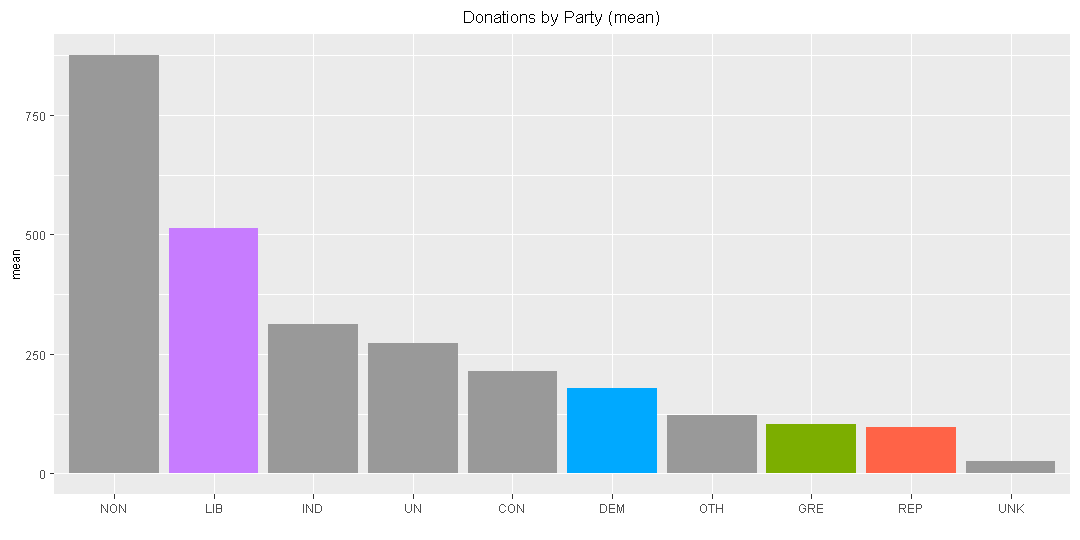

In [24]:
ggplot(data.party) + ggtitle("Donations by Party (mean)") + xlab("") +
geom_col(aes(x=sortby(CAND_PTY_AFFILIATION, mean, decreasing=TRUE), y=mean, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.no_legend

#### Average \\$ donated - adjusted for high mean candidates

In [25]:
data.cand.xhm = data.cand[data.cand$mean < 2800,]
fmt(data.cand.xhm, "excluding high mean candidates")

CAND_NAME,CAND_PTY_AFFILIATION,count,sum,mean
"ARANJO, ROLAND",GRE,1,10,10.00000
"ARMSTRONG, KENNETH REED",LIB,24,4463,185.95833
"AUGUSTSON, ALAN",GRE,7,305,43.57143
"AVINA, CANDACE MARIE BATES",UNK,1,25,25.00000
"BENNET, MICHAEL F.",DEM,7215,3172488,439.70728
"BIDEN, JOSEPH R JR",DEM,78279,25252681,322.59841
"BOOKER, CORY A.",DEM,31085,11212933,360.71845
"BRADFORD, SCOTT",IND,2,250,125.00000
"BRAINARD, CHRISTOPHER",REP,3,225,75.00000
"BULLOCK, STEVE",DEM,2363,1610952,681.74016


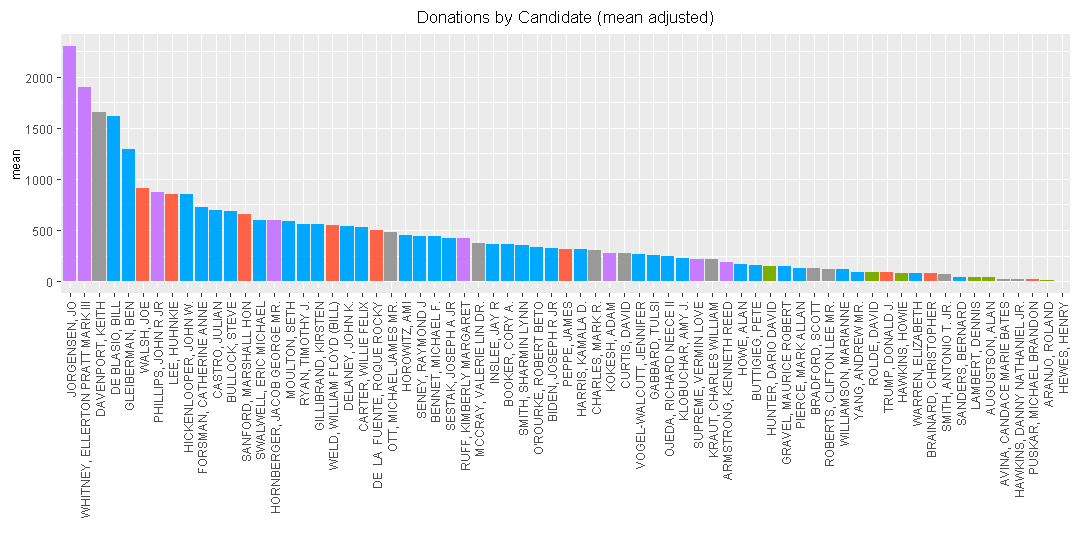

In [26]:
ggplot(data.cand.xhm) + ggtitle("Donations by Candidate (mean adjusted)") + xlab("") +
geom_col(aes(x=sortby(CAND_NAME, mean, decreasing=TRUE), y=mean, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.x_axis_90 + theme.no_legend

In [27]:
data.adjust = data[data$CAND_NAME %in% data.cand.xhm$CAND_NAME,]

data.party.xhm = aggregate(TRANSACTION_AMT ~ CAND_PTY_AFFILIATION, data.adjust, mean)
names(data.party.xhm)[2] = "mean"

data.party.xhm

CAND_PTY_AFFILIATION,mean
CON,213.25000
DEM,139.58662
GRE,102.23318
IND,312.79487
LIB,400.05738
NON,24.83333
OTH,122.14286
REP,95.47397
UN,273.00000
UNK,25.00000


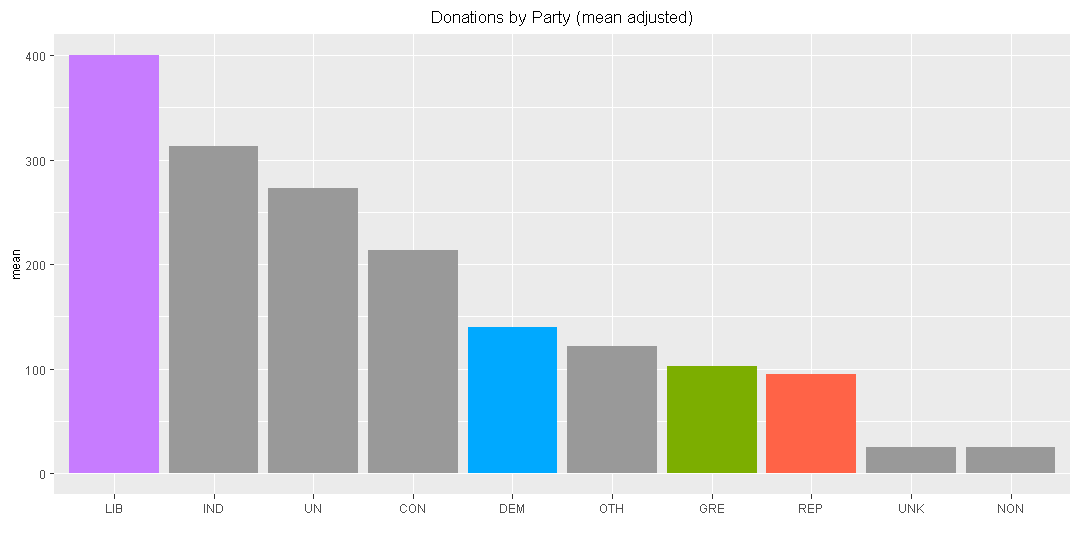

In [28]:
ggplot(data.party.xhm) + ggtitle("Donations by Party (mean adjusted)") + xlab("") +
geom_col(aes(x=sortby(CAND_PTY_AFFILIATION, mean, decreasing=TRUE), y=mean, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.no_legend

#### Average \\$ donated - adjusted for low count candidates

In [29]:
data.cand.xlc = data.cand[data.cand$count >= 100,]
fmt(data.cand.xlc, "excluding low count candidates")

CAND_NAME,CAND_PTY_AFFILIATION,count,sum,mean
"BENNET, MICHAEL F.",DEM,7215,3172488,439.70728
"BIDEN, JOSEPH R JR",DEM,78279,25252681,322.59841
"BOOKER, CORY A.",DEM,31085,11212933,360.71845
"BULLOCK, STEVE",DEM,2363,1610952,681.74016
"BUTTIGIEG, PETE",DEM,236617,38331987,162.00014
"CASTRO, JULIAN",DEM,1034,721642,697.91296
"DE BLASIO, BILL",DEM,811,1305671,1609.95191
"DELANEY, JOHN K.",DEM,1761,956172,542.97104
"GABBARD, TULSI",DEM,5210,1351823,259.46699
"GILLIBRAND, KIRSTEN",DEM,7820,4371956,559.07366


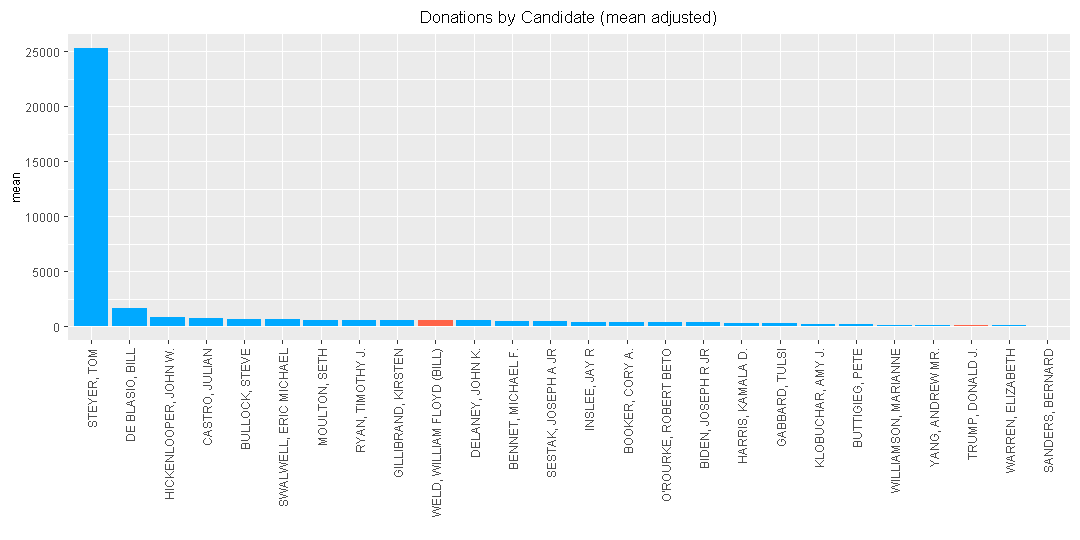

In [30]:
ggplot(data.cand.xlc) + ggtitle("Donations by Candidate (mean adjusted)") + xlab("") +
geom_col(aes(x=sortby(CAND_NAME, mean, decreasing=TRUE), y=mean, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.x_axis_90 + theme.no_legend

In [31]:
data.adjust = data[data$CAND_NAME %in% data.cand.xlc$CAND_NAME,]

data.party.xlc = aggregate(TRANSACTION_AMT ~ CAND_PTY_AFFILIATION, data.adjust, mean)
names(data.party.xlc)[2] = "mean"

data.party.xlc

CAND_PTY_AFFILIATION,mean
DEM,179.36995
REP,94.55765


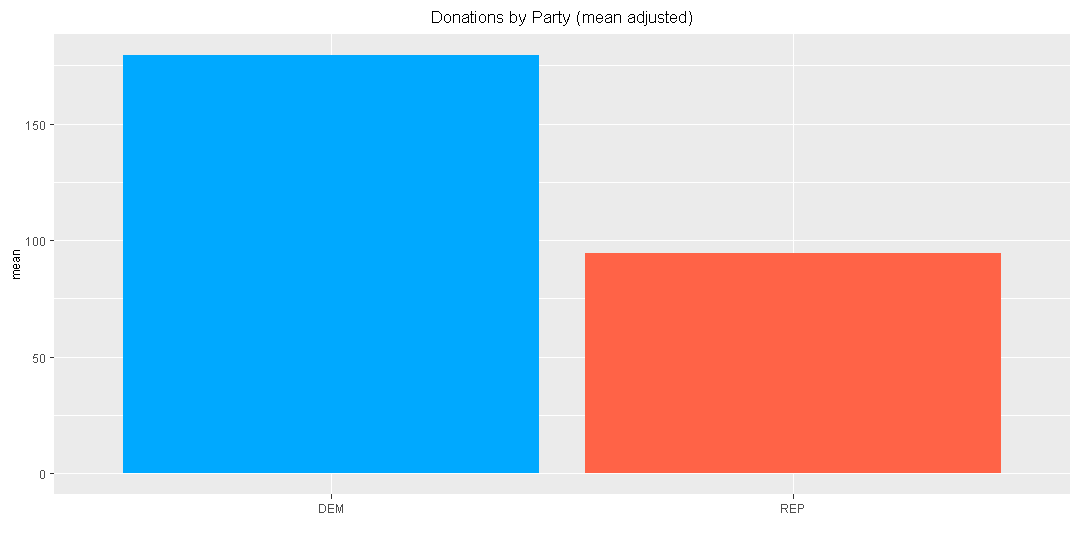

In [32]:
ggplot(data.party.xlc) + ggtitle("Donations by Party (mean adjusted)") + xlab("") +
geom_col(aes(x=sortby(CAND_PTY_AFFILIATION, mean, decreasing=TRUE), y=mean, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.no_legend

#### # donations, \\$ donated, average \\$ donated

variable,aspect
candidate,horizontal position
$ donated,vertical position
# donations,size
average $ donated,color intensity


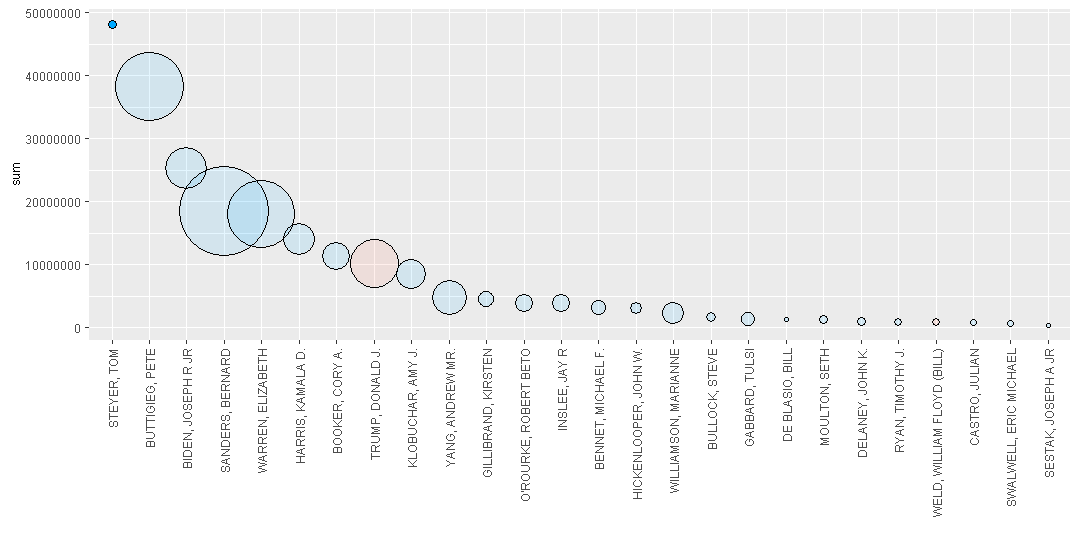

In [33]:
data.frame(variable=c("candidate","$ donated","# donations","average $ donated"),
           aspect=c("horizontal position","vertical position","size","color intensity"))

ggplot(data.cand.xlc) + xlab("") +
geom_point(aes(x=sortby(CAND_NAME, sum, decreasing=TRUE), y=sum, size=count, alpha=mean, color=CAND_PTY_AFFILIATION)) +
geom_point(aes(x=sortby(CAND_NAME, sum, decreasing=TRUE), y=sum, size=count), color="black", pch=1) +
scale_size_continuous(range=c(1,25)) +
theme.x_axis_90 + theme.no_legend

In [35]:
data.3d = data.cand.xlc[rank(data.cand.xlc$sum) > nrow(data.cand.xlc)-10, c("count","sum","mean","CAND_NAME","CAND_PTY_AFFILIATION")]
# text3d supports maximum of 21 text items, here plot 10 text items

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data.3d, type="s", col=PARTY_COLOR[as.character(data.3d$CAND_PTY_AFFILIATION)], alpha=0.2)
text3d(x=data.3d, text=data.3d$CAND_NAME)
grid3d(c("x","y","z"))
rglwidget(elementId="myplot", width=500, height=500, reuse=FALSE)

HTML widgets cannot be represented in plain text (need html)

### Perspective: By Occupation

In [46]:
df = as.data.frame(table(data[data$CAND_NAME == "BUTTIGIEG, PETE", "OCCUPATION"])) # 1st highest $ donated
fmt(df[order(df$Freq, decreasing=TRUE),][1:10,], "BUTTIGIEG, PETE")

Var1,Freq
NOT EMPLOYED,75816
ATTORNEY,7387
PHYSICIAN,5543
TEACHER,4770
RETIRED,4710
CONSULTANT,3879
PROFESSOR,2722
,2606
LAWYER,2537
ENGINEER,2354


In [47]:
df = as.data.frame(table(data[data$CAND_NAME == "BIDEN, JOSEPH R JR", "OCCUPATION"])) # 2nd highest $ donated
fmt(df[order(df$Freq, decreasing=TRUE),][1:10,], "BIDEN, JOSEPH R JR")

Var1,Freq
NOT EMPLOYED,32254
ATTORNEY,4906
RETIRED,3179
,1834
PHYSICIAN,1418
LAWYER,1330
CONSULTANT,1241
EXECUTIVE,867
NONE,814
CEO,735


In [48]:
df = as.data.frame(table(data[data$CAND_NAME == "WARREN, ELIZABETH", "OCCUPATION"])) # 3rd highest $ donated
fmt(df[order(df$Freq, decreasing=TRUE), ][1:10,], "WARREN, ELIZABETH")

Var1,Freq
NOT EMPLOYED,83488
RETIRED,14405
ATTORNEY,9906
PROFESSOR,5156
PHYSICIAN,5019
SOFTWARE ENGINEER,3997
TEACHER,3342
ENGINEER,2897
CONSULTANT,2669
WRITER,1927


In [49]:
df = as.data.frame(table(data[data$CAND_NAME == "SANDERS, BERNARD", "OCCUPATION"])) # 4th highest $ donated
fmt(df[order(df$Freq, decreasing=TRUE), ][1:10,], "SANDERS, BERNARD")

Var1,Freq
NOT EMPLOYED,102473
NONE,14277
TEACHER,10928
SOFTWARE ENGINEER,8794
ENGINEER,6476
ATTORNEY,4789
PHYSICIAN,4577
PROFESSOR,4243
RETIRED,3891
SALES,3606


In [50]:
df = as.data.frame(table(data[data$CAND_NAME == "TRUMP, DONALD J.", "OCCUPATION"])) # incumbent
fmt(df[order(df$Freq, decreasing=TRUE), ][1:10,], "TRUMP, DONALD J.")

Var1,Freq
RETIRED,47814
NOT EMPLOYED,7603
OWNER,2061
PHYSICIAN,1911
ENTREPRENEUR,1767
SALES,1520
ENGINEER,1105
MANAGER,1007
SELF-EMPLOYED,885
TEACHER,820


### Perspective: CEO

In [51]:
data.ceo = aggregate(TRANSACTION_AMT ~ CAND_NAME+CAND_PTY_AFFILIATION, data[data$OCCUPATION == "CEO",], length)
names(data.ceo)[3] = "count"

fmt(data.ceo[order(data.ceo$count, decreasing=TRUE),], "CEO")

CAND_NAME,CAND_PTY_AFFILIATION,count
"BUTTIGIEG, PETE",DEM,1623
"SANDERS, BERNARD",DEM,777
"TRUMP, DONALD J.",REP,742
"BIDEN, JOSEPH R JR",DEM,735
"YANG, ANDREW MR.",DEM,513
"WARREN, ELIZABETH",DEM,479
"HARRIS, KAMALA D.",DEM,417
"BOOKER, CORY A.",DEM,385
"GILLIBRAND, KIRSTEN",DEM,133
"BENNET, MICHAEL F.",DEM,120


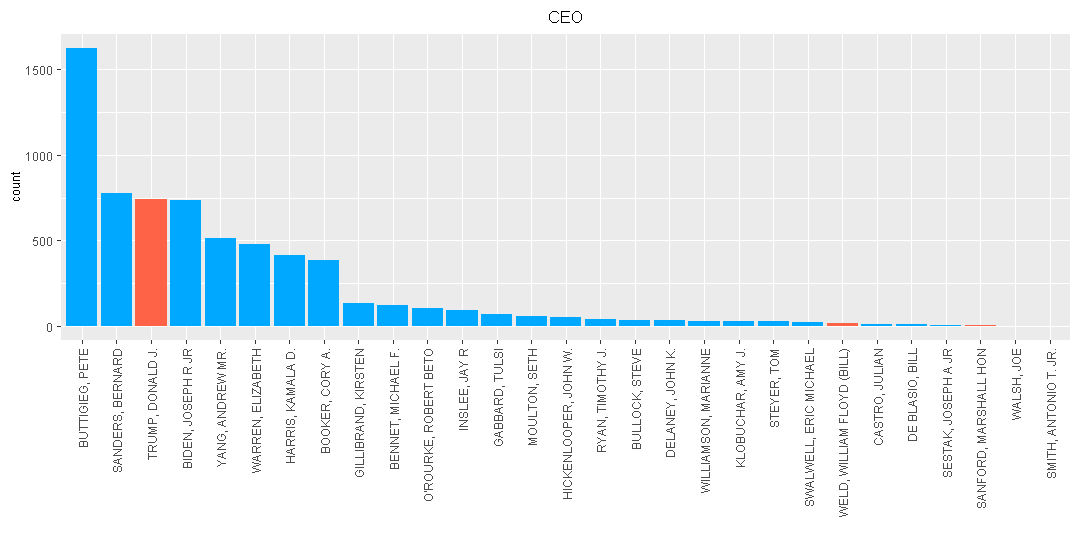

In [52]:
ggplot(data.ceo) + ggtitle("CEO") + xlab("") +
geom_col(aes(x=sortby(CAND_NAME, count, decreasing=TRUE), y=count, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.x_axis_90 + theme.no_legend

### Perspective: By Candidate & Tier

In [53]:
data.long = melt(data, id.vars=c("CAND_NAME","tier"), measure.vars="TRANSACTION_AMT")
data.cross = dcast(data.long, tier ~ CAND_NAME, sum)

fmt(data.cross, "$ donated by candidate & tier:", position="left")

tier,"ARMSTRONG, KENNETH REED","BEHRMAN, DAN TAXATION IS THEFT","BENNET, MICHAEL F.","BIDEN, JOSEPH R JR","BOOKER, CORY A.","BULLOCK, STEVE","BUTTIGIEG, PETE","CASTRO, JULIAN","CHARLES, MARK R.","COLLINS, JOE EDWARD III","DE LA FUENTE, ROQUE ROCKY","DE BLASIO, BILL","DELANEY, JOHN K.","FORSMAN, CATHERINE ANNE","GABBARD, TULSI","GILLIBRAND, KIRSTEN","GLEIBERMAN, BEN","GRAVEL, MAURICE ROBERT","HARRIS, KAMALA D.","HAWKINS, HOWIE","HICKENLOOPER, JOHN W.","HORNBERGER, JACOB GEORGE MR.","HOROWITZ, AMI","HOWE, ALAN","HUNTER, DARIO DAVID","INSLEE, JAY R","JORGENSEN, JO","KLOBUCHAR, AMY J.","KOKESH, ADAM","KRAUT, CHARLES WILLIAM","MCCRAY, VALERIE LIN DR.","MOULTON, SETH","O'ROURKE, ROBERT BETO","OJEDA, RICHARD NEECE II","OTT, MICHAEL JAMES MR.","PEPPE, JAMES","PHILLIPS, JOHN R JR","PIERCE, MARK ALLAN","POWERS, CHRISTIN NOEL MS.","ROBERTS, CLIFTON LEE MR.","ROLDE, DAVID","RUFF, KIMBERLY MARGARET","RYAN, TIMOTHY J.","SANDERS, BERNARD","SANFORD, MARSHALL HON","SESTAK, JOSEPH A JR","SMITH, ANTONIO T. JR.","SMITH, SHARMIN LYNN","STEYER, TOM","SUPREME, VERMIN LOVE","SWALWELL, ERIC MICHAEL","TRAHAN, CHANCE BRADFORD MR","TRUMP, DONALD J.","VOGEL-WALCUTT, JENNIFER","WALSH, JOE","WARREN, ELIZABETH","WELD, WILLIAM FLOYD (BILL)","WHITNEY, ELLERTON PRATT MARK III","WILLIAMSON, MARIANNE","YANG, ANDREW MR."
high,0,0,2446171,19634466,8849535,1280065,23533742,600548,10600,70000,3800,1248051,737661,1143,909722,3460204,1000,1000,9812560,0,2615964,8800,2800,0,0,2611280,2300,5698699,1000,1000,0,1259180,2316370,1000,0,2800,2800,3627,112022,0,1000,6056,672863,2559980,22700,219517,0,2997,414258,1400,455868,5976,3132828,0,56195,3892838,527079,5600,859888,1436461
mid,3772,375,663111,4692146,2283129,313498,13340824,109906,8007,0,4250,55634,213757,300,360575,833271,2900,8040,3451261,4422,449164,4730,1745,500,9153,1098176,0,2114458,2017,514,370,230733,1423742,850,476,2250,603,5890,0,836,250,1439,170150,8033500,15950,111387,350,3055,150373,2559,136076,0,5565323,800,14015,9465035,211776,0,980029,2166319
low,691,0,90700,1246565,433857,17389,3333171,11188,885,0,0,2036,15259,0,81451,78481,0,253,646297,1410,22893,131,9,76,1581,121981,0,610943,90,192,0,14023,140612,135,0,0,94,2071,0,19,0,139,16707,7906449,0,6900,160,239,8888,841,6434,0,2294935,0,45,4612324,11969,0,332140,1185486
other,0,0,-30294,-320496,-353588,0,-1875750,0,0,0,0,-50,-10505,0,0,0,0,0,0,0,-150319,0,0,0,0,-28385,0,-500,0,0,0,-304302,0,0,0,0,0,0,0,0,0,0,-2800,0,0,-251,0,0,0,0,0,0,-838363,0,-2800,-2800,-10520,0,-2000,0


In [54]:
data.cross.long = melt(data.cross, id.vars="tier")
# data.cross.long[1:10,]

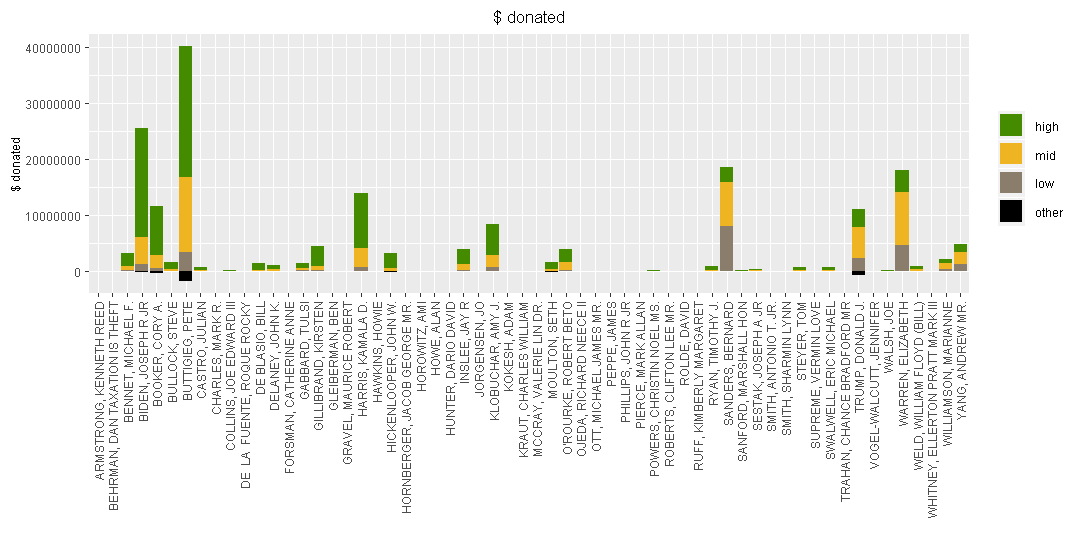

In [55]:
ggplot(data.cross.long) + ggtitle("$ donated") + xlab("") + ylab("$ donated") +
geom_col(aes(x=variable, y=value, fill=tier)) +
scale_fill_manual(values=c(PALETTE[c(6,5,8)], "black")) +
theme.x_axis_90

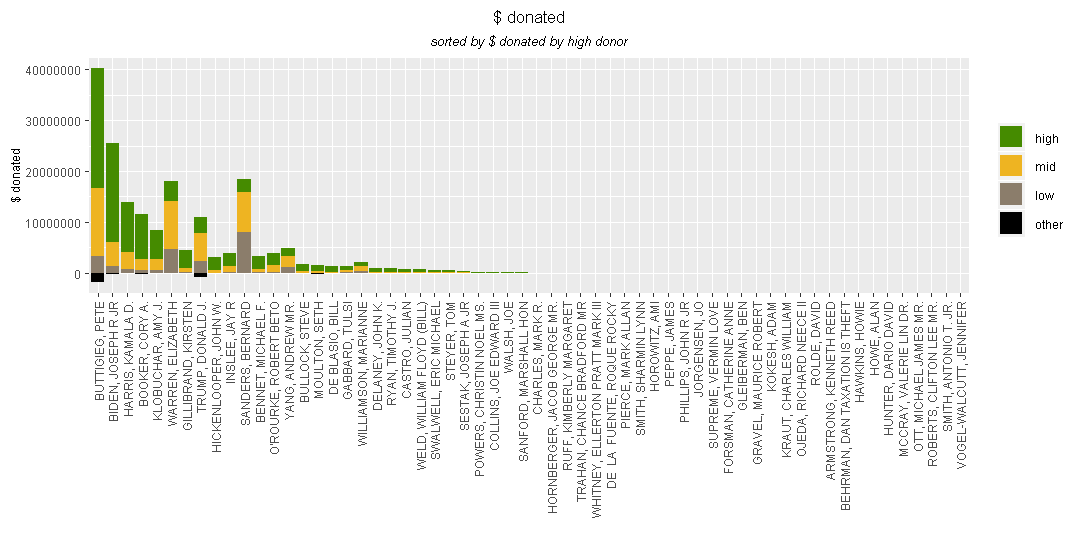

In [56]:
data.cross.long.tier = data.cross.long[data.cross.long$tier=="high",]
data.cross.long.tier$ranking = rank(data.cross.long.tier$value)
data.cross.long.rank = merge(data.cross.long, data.cross.long.tier[,c("variable", "ranking")])

ggplot(data.cross.long.rank) + ggtitle("$ donated","sorted by $ donated by high donor") +
xlab("") + ylab("$ donated") +
geom_col(aes(x=sortby(variable, ranking, decreasing=TRUE), y=value, fill=tier)) +
scale_fill_manual(values=c(PALETTE[c(6,5,8)], "black")) +
theme.x_axis_90

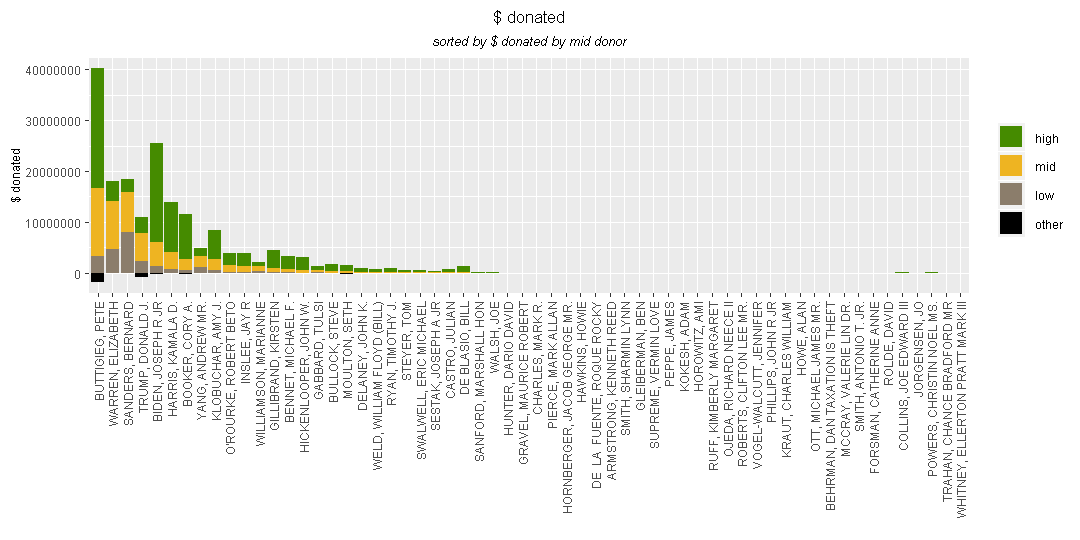

In [57]:
data.cross.long.tier = data.cross.long[data.cross.long$tier=="mid",]
data.cross.long.tier$ranking = rank(data.cross.long.tier$value)
data.cross.long.rank = merge(data.cross.long, data.cross.long.tier[,c("variable", "ranking")])

ggplot(data.cross.long.rank) + ggtitle("$ donated","sorted by $ donated by mid donor") +
xlab("") + ylab("$ donated") +
geom_col(aes(x=sortby(variable, ranking, decreasing=TRUE), y=value, fill=tier)) +
scale_fill_manual(values=c(PALETTE[c(6,5,8)], "black")) +
theme.x_axis_90

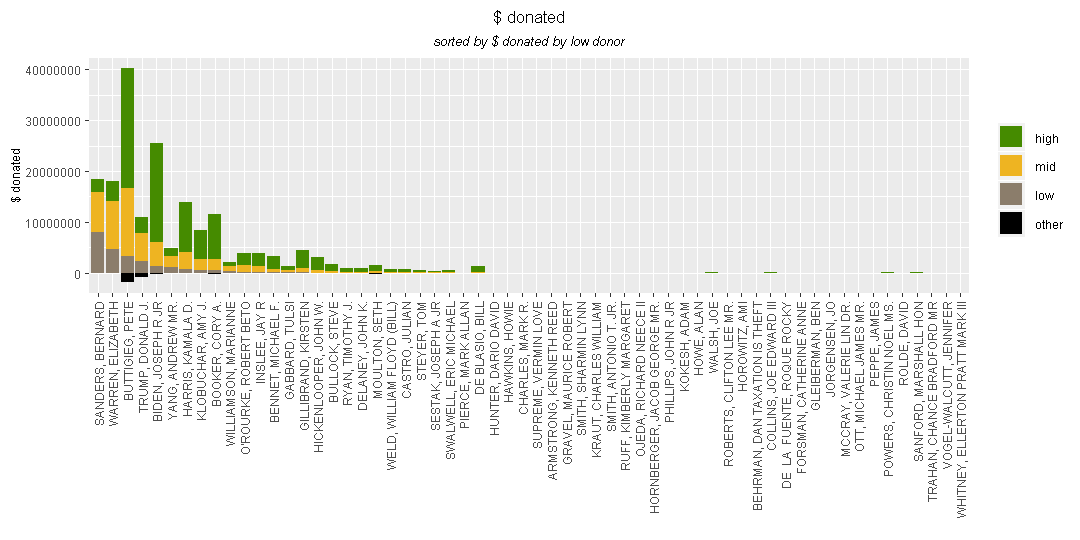

In [58]:
data.cross.long.tier = data.cross.long[data.cross.long$tier=="low",]
data.cross.long.tier$ranking = rank(data.cross.long.tier$value)
data.cross.long.rank = merge(data.cross.long, data.cross.long.tier[,c("variable", "ranking")])

ggplot(data.cross.long.rank) + ggtitle("$ donated","sorted by $ donated by low donor") +
xlab("") + ylab("$ donated") +
geom_col(aes(x=sortby(variable, ranking, decreasing=TRUE), y=value, fill=tier)) +
scale_fill_manual(values=c(PALETTE[c(6,5,8)], "black")) +
theme.x_axis_90

## Where Did They Donate?

### Perspective: By City

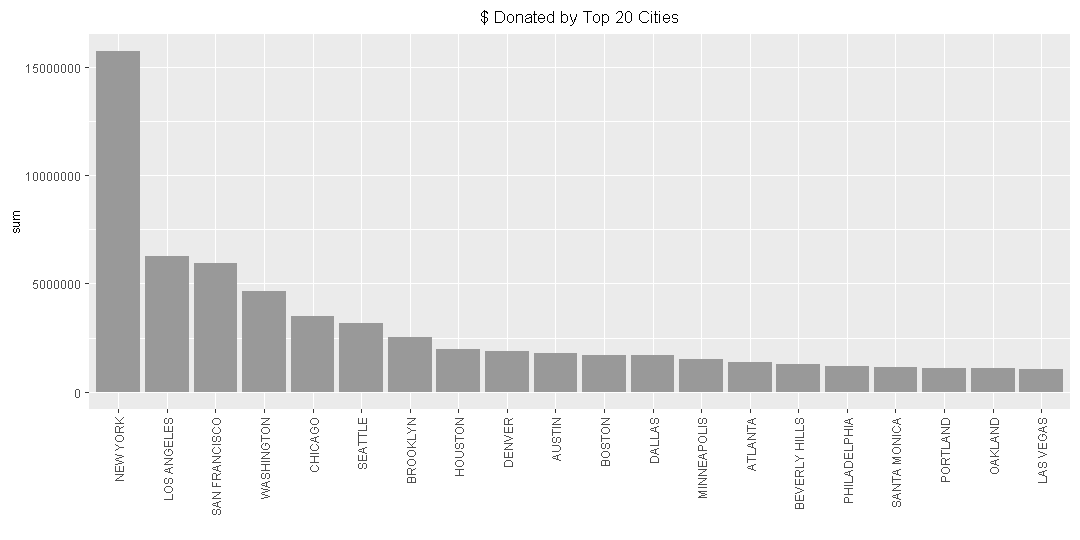

In [59]:
data.city = aggregate(TRANSACTION_AMT ~ CITY, data, sum)
names(data.city)[2] = "sum"

ggplot(data.city[order(data.city$sum, decreasing=TRUE),][1:20,]) +
ggtitle("$ Donated by Top 20 Cities") + xlab("") +
geom_col(aes(x=sortby(CITY, sum, decreasing=TRUE), y=sum), fill="gray60") +
theme.x_axis_90 + theme.no_legend

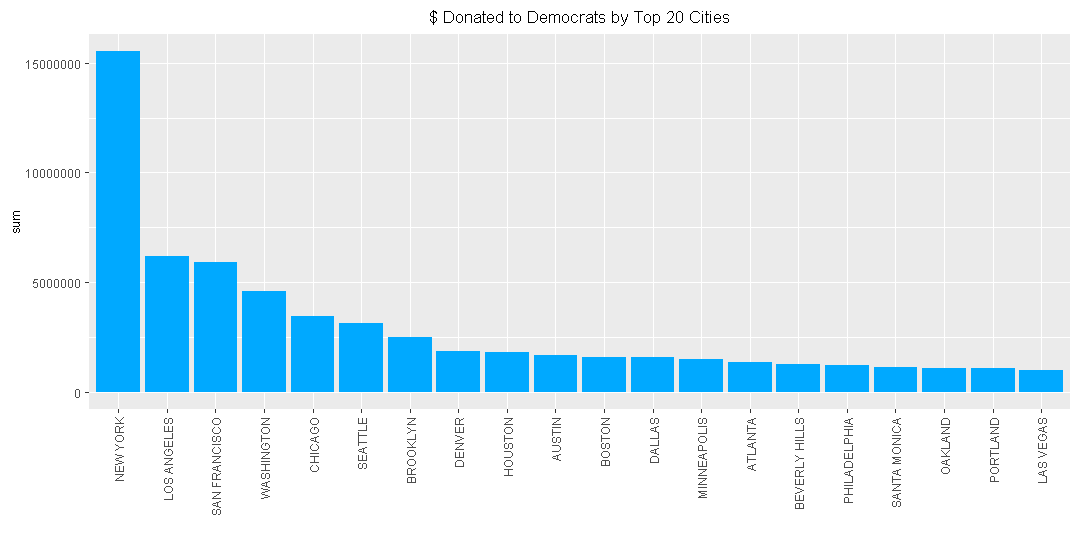

In [60]:
data.city.dem = aggregate(TRANSACTION_AMT ~ CITY, data[data$CAND_PTY_AFFILIATION == "DEM",], sum)
names(data.city.dem)[2] = "sum"

ggplot(data.city.dem[order(data.city.dem$sum, decreasing=TRUE),][1:20,]) +
ggtitle("$ Donated to Democrats by Top 20 Cities") + xlab("") +
geom_col(aes(x=sortby(CITY, sum, decreasing=TRUE), y=sum), fill=PARTY_COLOR["DEM"]) +
theme.x_axis_90 + theme.no_legend

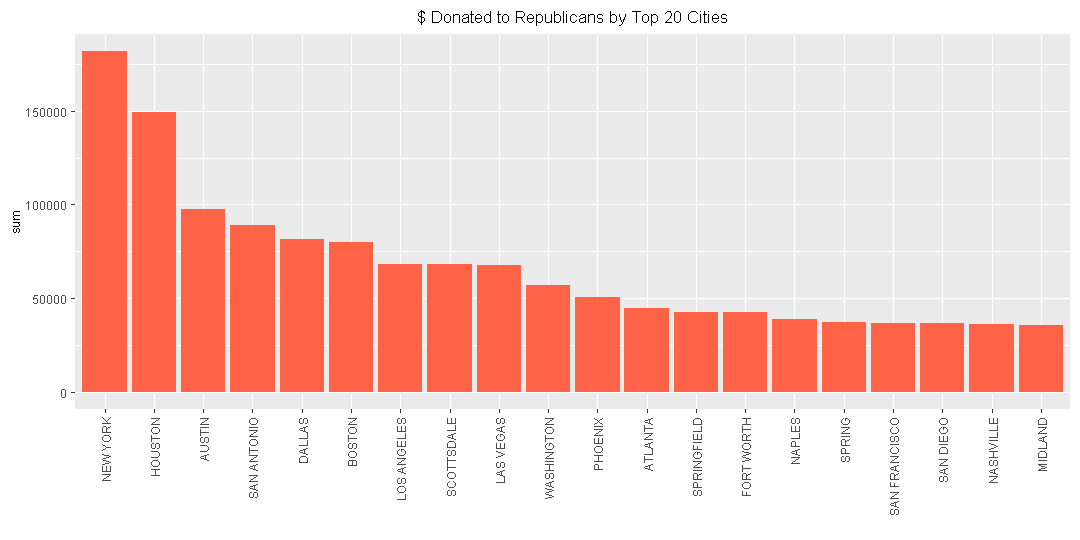

In [61]:
data.city.rep = aggregate(TRANSACTION_AMT ~ CITY, data[data$CAND_PTY_AFFILIATION == "REP",], sum)
names(data.city.rep)[2] = "sum"

ggplot(data.city.rep[order(data.city.rep$sum, decreasing=TRUE),][1:20,]) +
ggtitle("$ Donated to Republicans by Top 20 Cities") + xlab("") +
geom_col(aes(x=sortby(CITY, sum, decreasing=TRUE), y=sum), fill=PARTY_COLOR["REP"]) +
theme.x_axis_90 + theme.no_legend

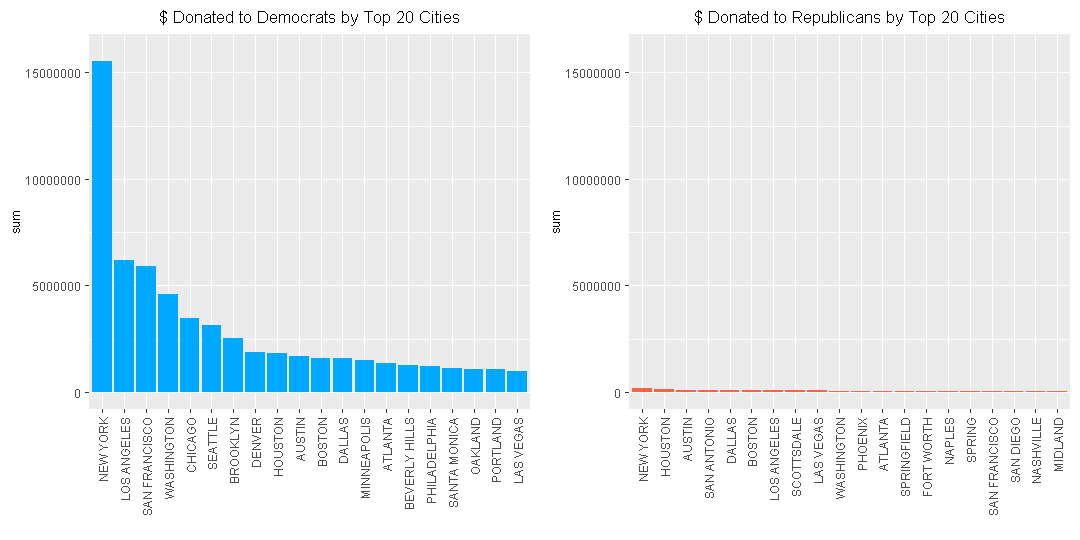

In [62]:
p1 = ggplot(data.city.dem[order(data.city.dem$sum, decreasing=TRUE),][1:20,]) +
     ggtitle("$ Donated to Democrats by Top 20 Cities") +
     ylim(0,16000000) + xlab("") +
     geom_col(aes(x=sortby(CITY, sum, decreasing=TRUE), y=sum), fill=PARTY_COLOR["DEM"]) +
     theme.x_axis_90 + theme.no_legend

p2 = ggplot(data.city.rep[order(data.city.rep$sum, decreasing=TRUE),][1:20,]) +
     ggtitle("$ Donated to Republicans by Top 20 Cities") +
     ylim(0,16000000) + xlab("") +
     geom_col(aes(x=sortby(CITY, sum, decreasing=TRUE), y=sum), fill=PARTY_COLOR["REP"]) +
     theme.x_axis_90 + theme.no_legend

grid.arrange(p1, p2, nrow=1)

### Perspective: Berkeley

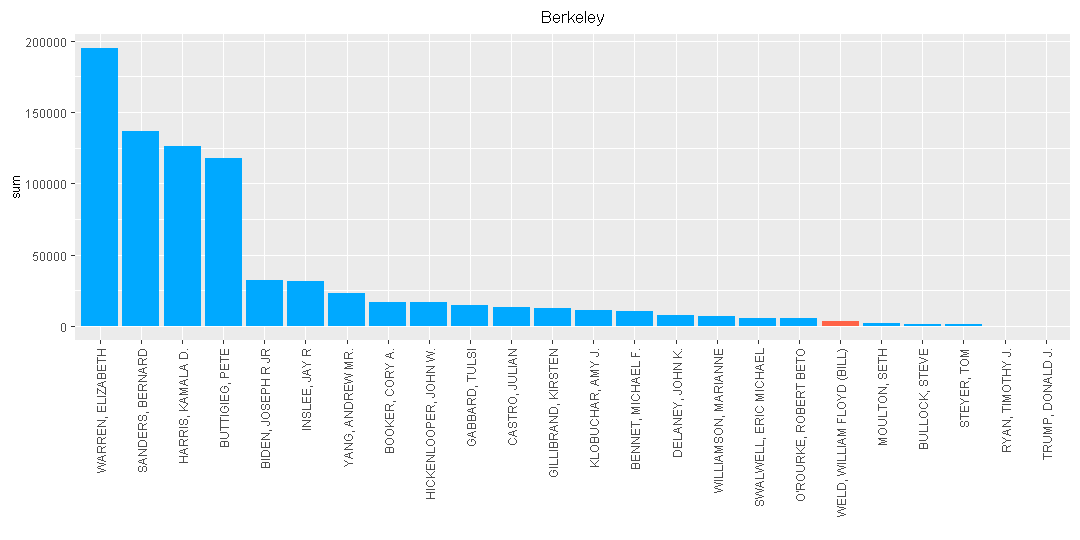

In [63]:
data.berkeley = aggregate(TRANSACTION_AMT ~ CAND_NAME+CAND_PTY_AFFILIATION, data[data$CITY == "BERKELEY",], sum)
names(data.berkeley)[3] = "sum"

ggplot(data.berkeley[order(data.berkeley$sum, decreasing=TRUE),]) + ggtitle("Berkeley") + xlab("") +
geom_col(aes(x=sortby(CAND_NAME, sum, decreasing=TRUE), y=sum, fill=CAND_PTY_AFFILIATION)) +
scale_fill_manual(values=PARTY_COLOR) +
theme.x_axis_90 + theme.no_legend

## When Did They Donate?

Time difference of 6.241145 mins


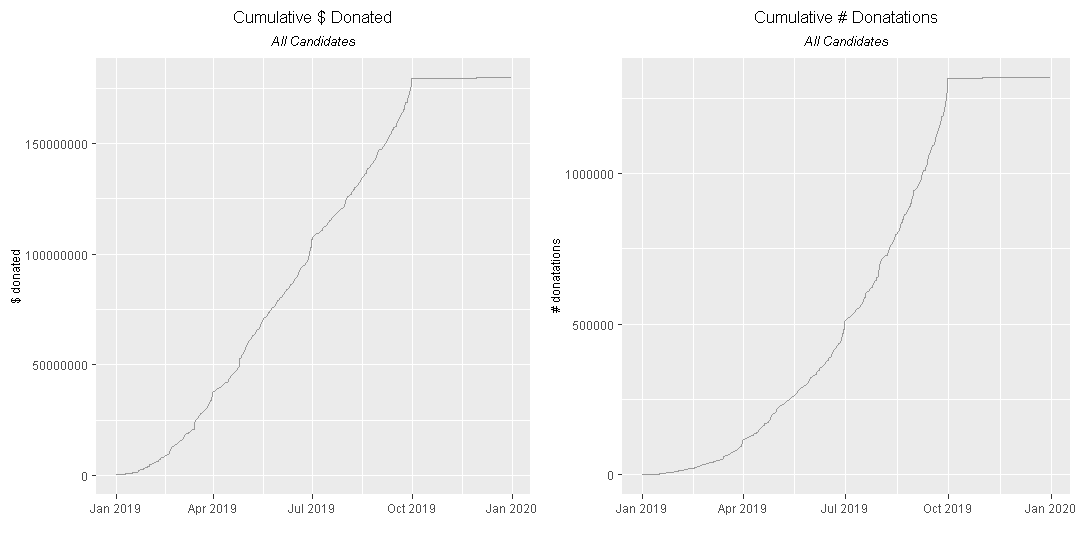

In [64]:
clock.start() # may take about 7 minutes

start_date = ymd("2019-01-01")
stop_date  = max(data$TRANSACTION_DT)

sum.pre = sum(data$TRANSACTION_AMT[data$TRANSACTION_DT < start_date])
count.pre = sum(data$count[data$TRANSACTION_DT < start_date])

data.since = data[data$TRANSACTION_DT >= start_date,]
data.since = data.since[order(data.since$TRANSACTION_DT),]
data.since$count = 1


p1 = ggplot(data.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative $ Donated","All Candidates") + xlab("") + ylab("$ donated") +
     geom_step(aes(x=TRANSACTION_DT, y=sum.pre+cumsum(TRANSACTION_AMT)), color="gray60")

p2 = ggplot(data.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative # Donatations","All Candidates") + xlab("") + ylab("# donatations") +
     geom_step(aes(x=TRANSACTION_DT, y=count.pre+cumsum(count)), color="gray60")

grid.arrange(p1, p2, nrow=1)

clock.stop()

Time difference of 12.19445 secs


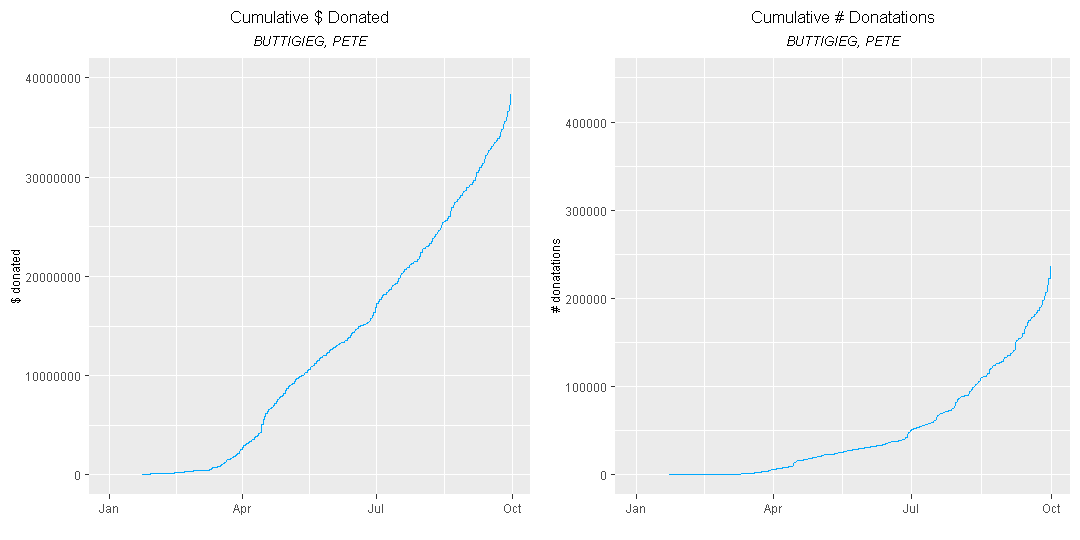

In [65]:
clock.start() # may take about 30 seconds

start_date = ymd("2019-01-01")
stop_date  = ymd("2019-09-30")

data.who = data[data$CAND_NAME == "BUTTIGIEG, PETE", ]

sum.pre = sum(data.who$TRANSACTION_AMT[data.who$TRANSACTION_DT < start_date])
count.pre = sum(data.who$count[data.who$TRANSACTION_DT < start_date])

data.who.since = data.who[data.who$TRANSACTION_DT >= start_date,]
data.who.since = data.who.since[order(data.who.since$TRANSACTION_DT),]
data.who.since$count = 1


p1 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative $ Donated","BUTTIGIEG, PETE") + xlab("") + ylab("$ donated") + ylim(0,40000000) +
     geom_step(aes(x=TRANSACTION_DT, y=sum.pre+cumsum(TRANSACTION_AMT)), color=PARTY_COLOR["DEM"])

p2 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative # Donatations","BUTTIGIEG, PETE") + xlab("") + ylab("# donatations") + ylim(0,450000) +
     geom_step(aes(x=TRANSACTION_DT, y=count.pre+cumsum(count)), color=PARTY_COLOR["DEM"])

grid.arrange(p1, p2, nrow=1)

clock.stop()

Time difference of 4.975504 secs


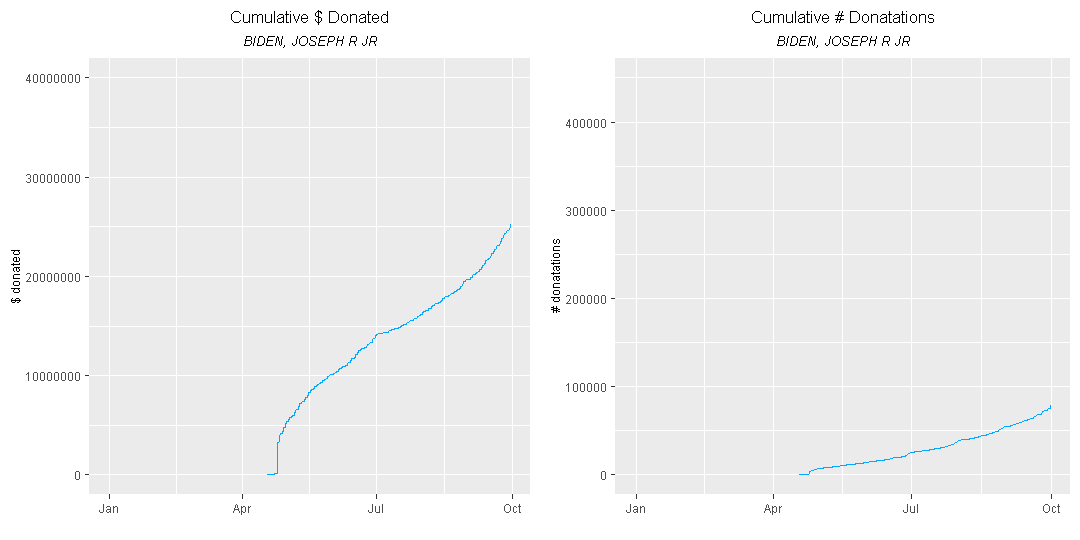

In [66]:
clock.start() # may take about 30 seconds

start_date = ymd("2019-01-01")
stop_date  = ymd("2019-09-30")

data.who = data[data$CAND_NAME == "BIDEN, JOSEPH R JR", ]

sum.pre = sum(data.who$TRANSACTION_AMT[data.who$TRANSACTION_DT < start_date])
count.pre = sum(data.who$count[data.who$TRANSACTION_DT < start_date])

data.who.since = data.who[data.who$TRANSACTION_DT >= start_date,]
data.who.since = data.who.since[order(data.who.since$TRANSACTION_DT),]
data.who.since$count = 1


p1 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative $ Donated","BIDEN, JOSEPH R JR") + xlab("") + ylab("$ donated") + ylim(0,40000000) +
     geom_step(aes(x=TRANSACTION_DT, y=sum.pre+cumsum(TRANSACTION_AMT)), color=PARTY_COLOR["DEM"])

p2 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative # Donatations","BIDEN, JOSEPH R JR") + xlab("") + ylab("# donatations") + ylim(0,450000) +
     geom_step(aes(x=TRANSACTION_DT, y=count.pre+cumsum(count)), color=PARTY_COLOR["DEM"])

grid.arrange(p1, p2, nrow=1)

clock.stop()

Time difference of 11.34898 secs


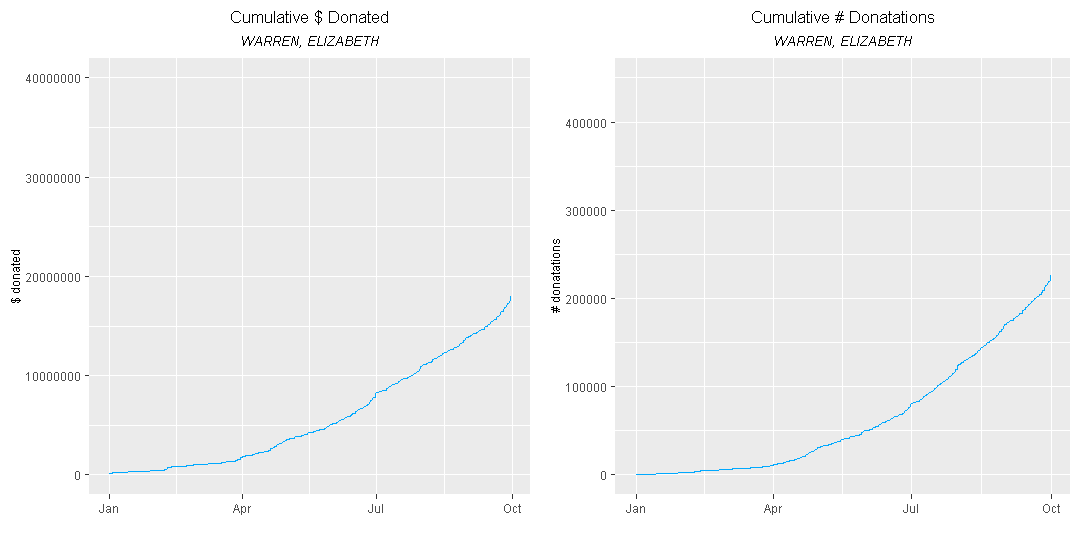

In [67]:
clock.start() # may take about 30 seconds

start_date = ymd("2019-01-01")
stop_date  = ymd("2019-09-30")

data.who = data[data$CAND_NAME == "WARREN, ELIZABETH", ]

sum.pre = sum(data.who$TRANSACTION_AMT[data.who$TRANSACTION_DT < start_date])
count.pre = sum(data.who$count[data.who$TRANSACTION_DT < start_date])

data.who.since = data.who[data.who$TRANSACTION_DT >= start_date,]
data.who.since = data.who.since[order(data.who.since$TRANSACTION_DT),]
data.who.since$count = 1


p1 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative $ Donated","WARREN, ELIZABETH") + xlab("") + ylab("$ donated") + ylim(0,40000000) +
     geom_step(aes(x=TRANSACTION_DT, y=sum.pre+cumsum(TRANSACTION_AMT)), color=PARTY_COLOR["DEM"])

p2 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative # Donatations","WARREN, ELIZABETH") + xlab("") + ylab("# donatations") + ylim(0,450000) +
     geom_step(aes(x=TRANSACTION_DT, y=count.pre+cumsum(count)), color=PARTY_COLOR["DEM"])

grid.arrange(p1, p2, nrow=1)

clock.stop()

Time difference of 28.91766 secs


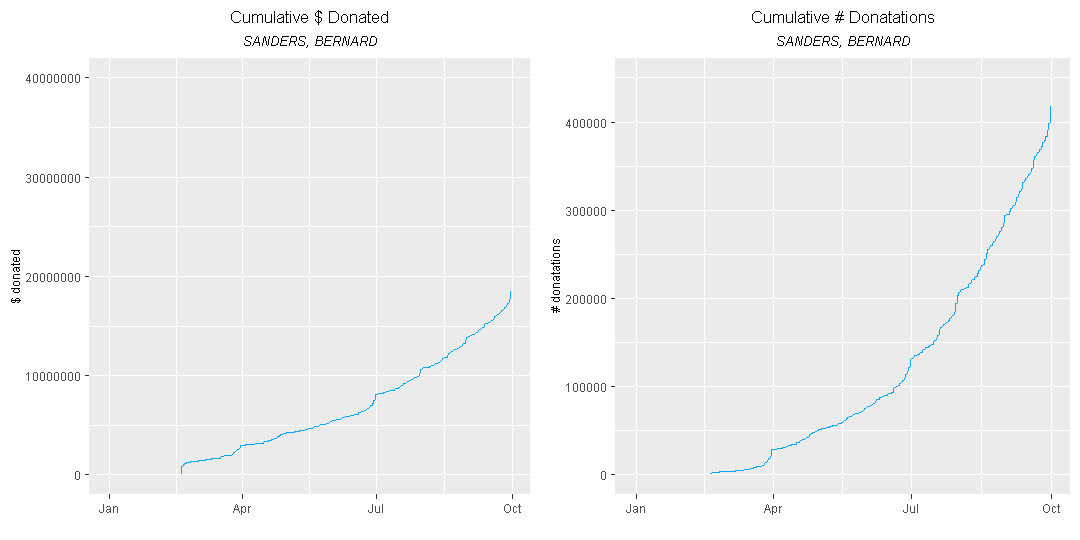

In [68]:
clock.start() # may take about 30 seconds

start_date = ymd("2019-01-01")
stop_date  = ymd("2019-09-30")

data.who = data[data$CAND_NAME == "SANDERS, BERNARD", ]

sum.pre = sum(data.who$TRANSACTION_AMT[data.who$TRANSACTION_DT < start_date])
count.pre = sum(data.who$count[data.who$TRANSACTION_DT < start_date])

data.who.since = data.who[data.who$TRANSACTION_DT >= start_date,]
data.who.since = data.who.since[order(data.who.since$TRANSACTION_DT),]
data.who.since$count = 1


p1 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative $ Donated","SANDERS, BERNARD") + xlab("") + ylab("$ donated") + ylim(0,40000000) +
     geom_step(aes(x=TRANSACTION_DT, y=sum.pre+cumsum(TRANSACTION_AMT)), color=PARTY_COLOR["DEM"])

p2 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative # Donatations","SANDERS, BERNARD") + xlab("") + ylab("# donatations") + ylim(0,450000) +
     geom_step(aes(x=TRANSACTION_DT, y=count.pre+cumsum(count)), color=PARTY_COLOR["DEM"])

grid.arrange(p1, p2, nrow=1)

clock.stop()

Time difference of 5.825914 secs


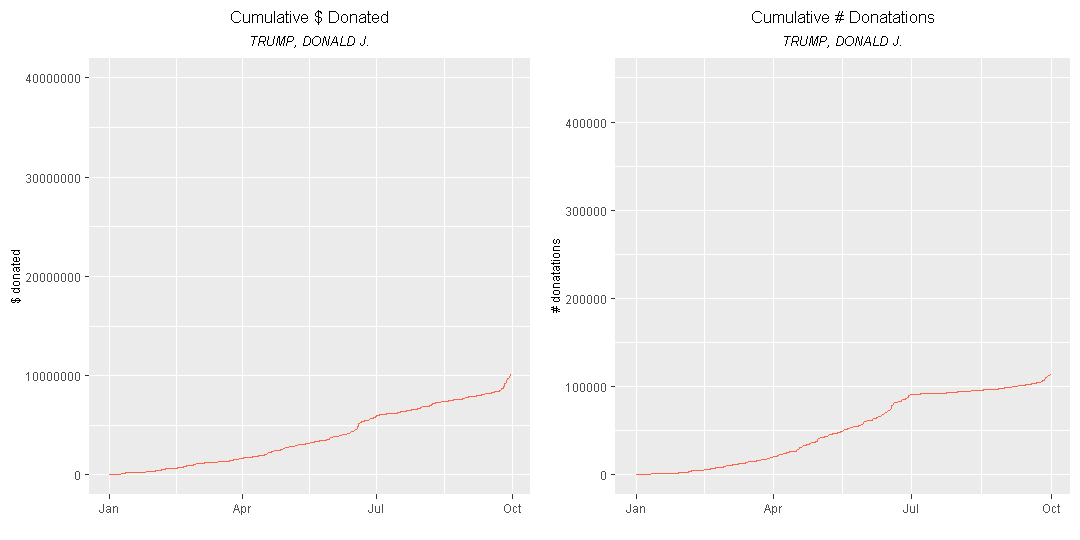

In [69]:
clock.start() # may take about 30 seconds

start_date = ymd("2019-01-01")
stop_date  = ymd("2019-09-30")

data.who = data[data$CAND_NAME == "TRUMP, DONALD J.", ]

sum.pre = sum(data.who$TRANSACTION_AMT[data.who$TRANSACTION_DT < start_date])
count.pre = sum(data.who$count[data.who$TRANSACTION_DT < start_date])

data.who.since = data.who[data.who$TRANSACTION_DT >= start_date,]
data.who.since = data.who.since[order(data.who.since$TRANSACTION_DT),]
data.who.since$count = 1


p1 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative $ Donated","TRUMP, DONALD J.") + xlab("") + ylab("$ donated") + ylim(0,40000000) +
     geom_step(aes(x=TRANSACTION_DT, y=sum.pre+cumsum(TRANSACTION_AMT)), color=PARTY_COLOR["REP"])

p2 = ggplot(data.who.since) + xlim(start_date, stop_date) + 
     ggtitle("Cumulative # Donatations","TRUMP, DONALD J.") + xlab("") + ylab("# donatations") + ylim(0,450000) +
     geom_step(aes(x=TRANSACTION_DT, y=count.pre+cumsum(count)), color=PARTY_COLOR["REP"])

grid.arrange(p1, p2, nrow=1)

clock.stop()

## Discussion

* What insights do you get from the data that can inform your fundraising strategy?
* What will be your fundraising strategy?
* What other insights might you find with more data exploration?

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised February 6, 2020
</span>
</p>